In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
# from carps.analysis.process_data import get_interpolated_performance_df, load_logs, process_logs
import importlib
import carps
import carps.analysis
import carps.analysis.gather_data
importlib.reload(carps)
importlib.reload(carps.analysis.gather_data)
from carps.analysis.gather_data import normalize_logs, get_interpolated_performance_df, load_logs, process_logs


def print_overview(df_trials: pd.DataFrame) -> None:
    print(df_trials.columns)
    print(df_trials["optimizer_id"].unique())
    print(df_trials["benchmark_id"].unique())
    print(df_trials["problem_id"].unique())
    print(df_trials["scenario"].unique())
    print("Number of seeds", df_trials["seed"].nunique())


# rundir = "../runs"
# df, df_cfg = load_logs(rundir=rundir)
# df = pd.read_csv("../logs_combined.csv")
# df_cfg = pd.read_csv("../logs_combined_cfg.csv")

paths = {
    "BBfull": {
        "full": [
        "../runs/SMAC3-BlackBoxFacade",
        "../runs/RandomSearch",
        "../runs/Nevergrad-CMA-ES",
    ]},
    "MOfull": {
        "full": ["../runs_MO"]
    },
    "BBsubset": {
        "dev": ["../runs_subset_BB/dev"],
        "test": ["../runs_subset_BB/test"],
    }
}
subset = "MOfull"
problem_prefix = "blackbox/30"


def load_set(paths: list[str], set_id: str = "unknown") -> tuple[pd.DataFrame, pd.DataFrame]:
    logs = []
    for p in paths:
        fn = Path(p) / "trajectory.parquet"
        if not fn.is_file():
            fn = Path(p) / "logs.parquet"
        logs.append(pd.read_parquet(fn))

    df = pd.concat(logs).reset_index(drop=True)
    df_cfg = pd.concat([pd.read_parquet(Path(p) / "logs_cfg.parquet") for p in paths]).reset_index(drop=True)
    df["set"] = set_id
    return df, df_cfg

loaded = [load_set(paths=ps, set_id=set_id) for set_id, ps in paths[subset].items()]
df = pd.concat([d for d, _ in loaded]).reset_index(drop=True)
df_cfg = pd.concat([d for _, d in loaded]).reset_index(drop=True)


print(df.columns)
df = normalize_logs(df)
print_overview(df)
perf = get_interpolated_performance_df(df)
perf_time = get_interpolated_performance_df(df, x_column="time_norm")


Index(['n_trials', 'n_incumbents', 'trial_value__cost',
       'trial_value__cost_inc', 'scenario', 'benchmark_id', 'problem_id',
       'optimizer_id', 'seed', 'reference_point', 'hypervolume', 'set'],
      dtype='object')


[10:14:17] INFO     Start normalization...                                                       ]8;id=615262;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=47486;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#317\317]8;;\

           INFO     Normalize n_trials...                                                        ]8;id=916629;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=954287;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#318\318]8;;\

           INFO     Normalize cost...                                                            ]8;id=158703;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=769638;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#320\320]8;;\

           INFO     Calc normalized incumbent cost...                                            ]8;id=782712;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=90628;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#329\329]8;;\

           INFO     Normalize time...                                                            ]8;id=153947;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=170417;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#333\333]8;;\

           INFO     Done.                                                                        ]8;id=428767;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=332113;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#336\336]8;;\

Index(['n_trials', 'n_incumbents', 'trial_value__cost',
       'trial_value__cost_inc', 'scenario', 'benchmark_id', 'problem_id',
       'optimizer_id', 'seed', 'reference_point', 'hypervolume', 'set',
       'n_trials_norm', 'trial_value__cost_norm', 'trial_value__cost_inc_norm',
       'time', 'time_norm'],
      dtype='object')
['Nevergrad-DE' 'Nevergrad-ES' 'Optuna-MO' 'RandomSearch' 'SMAC3-MO'
 'SMAC3-MO-GP' 'SyneTune-BO-MO-LS' 'SyneTune-BO-MO-RS']
['HPOBench' 'Pymoo' 'YAHPO']
['hpobench/MO/tab/ml/lr/10101' 'hpobench/MO/tab/ml/lr/12'
 'hpobench/MO/tab/ml/lr/146212' 'hpobench/MO/tab/ml/lr/146606'
 'hpobench/MO/tab/ml/lr/146818' 'hpobench/MO/tab/ml/lr/146821'
 'hpobench/MO/tab/ml/lr/146822' 'hpobench/MO/tab/ml/lr/14965'
 'hpobench/MO/tab/ml/lr/167119' 'hpobench/MO/tab/ml/lr/167120'
 'hpobench/MO/tab/ml/lr/168911' 'hpobench/MO/tab/ml/lr/168912'
 'hpobench/MO/tab/ml/lr/3' 'hpobench/MO/tab/ml/lr/31'
 'hpobench/MO/tab/ml/lr/3917' 'hpobench/MO/tab/ml/lr/53'
 'hpobench/MO/tab/ml/lr/7592' 

           INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=419796;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=753327;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#375\375]8;;\
                    budget.                                                                                        

[10:14:25] INFO     Create dataframe for neat plotting by aligning x-axis / interpolating        ]8;id=414901;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py\gather_data.py]8;;\:]8;id=816851;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/gather_data.py#375\375]8;;\
                    budget.                                                                                        

In [2]:
from carps.analysis.run_autorank import get_df_crit
normalize_performance = True
perf_col = "trial_value__cost_inc_norm" if normalize_performance else "trial_value__cost_inc"
df_crit = get_df_crit(df, perf_col=perf_col)
df_crit.iloc[:,:3].to_csv("df_crit.csv")

[10:14:36] INFO     Lost following experiments: optimizer_id                      Nevergrad-DE  ]8;id=372836;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=847538;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#108\108]8;;\
                    Nevergrad-ES  Optuna-MO  \                                                                     
                    problem_id                                                                                     
                    yahpo/mo/iaml_ranger/1067/None        1.000000      1.000000        NaN                        
                    yahpo/mo/iaml_ranger/1489/None        0.801616      0.841368        NaN                        
                    yahpo/mo/iaml_super/1067/None              NaN           NaN        NaN                        
                    yahpo/mo/iaml_super/1489/None              NaN           NaN        NaN                        
                    yahpo/mo/iaml_xgboost/1489/None       0.791115      0.764799        NaN                        
                    yahpo/mo/iaml_xgboost/40981/None      0.828346      0.812831        NaN                        
                    yahpo/mo/rbv2_ranger/375/None         0.586423      0.625553        NaN                        
                    yahpo/mo/rbv2_ranger/40979/None       0.553600      0.600753        NaN                        
                    yahpo/mo/rbv2_ranger/6/None           0.454426      0.477500        NaN                        
                    yahpo/mo/rbv2_super/1053/None              NaN           NaN        NaN                        
                    yahpo/mo/rbv2_super/1457/None              NaN           NaN        NaN                        
                    yahpo/mo/rbv2_super/6/None                 NaN           NaN        NaN                        
                    yahpo/mo/rbv2_xgboost/12/None         0.302183      0.471952        NaN                        
                    yahpo/mo/rbv2_xgboost/182/None        0.220703      0.360489        NaN                        
                    yahpo/mo/rbv2_xgboost/28/None         0.140828      0.292698        NaN                        
                                                                                                                   
                    optimizer_id                      RandomSearch  SMAC3-MO  SMAC3-MO-GP  \                       
                    problem_id                                                                                     
                    yahpo/mo/iaml_ranger/1067/None        0.925860  0.854088     0.189526                          
                    yahpo/mo/iaml_ranger/1489/None        0.587543  0.570655     0.467442                          
                    yahpo/mo/iaml_super/1067/None         0.039071  0.040331     0.031974                          
                    yahpo/mo/iaml_super/1489/None         0.310492  0.331486     0.259413                          
                    yahpo/mo/iaml_xgboost/1489/None       0.039530  0.098372     0.047888                          
                    yahpo/mo/iaml_xgboost/40981/None      0.106395  0.160418     0.047509                          
                    yahpo/mo/rbv2_ranger/375/None         0.239960  0.095015     0.055599                          
                    yahpo/mo/rbv2_ranger/40979/None       0.258484  0.136044     0.072447                          
                    yahpo/mo/rbv2_ranger/6/None           0.116523  0.058891     0.036115                          
                    yahpo/mo/rbv2_super/1053/None         0.114199  0.082468     0.011142                          
                    yahpo/mo/rbv2_super/1457/None         0.077391  0.017323     0.005149                          
                    

In [3]:
np.array(pd.Series({"a":1, "b":2}))

array([1, 2])

In [4]:
df[(df["optimizer_id"]=="SMAC3-MO") & (df["problem_id"]=="Pymoo/MO/zdt3") & (df["seed"]==2)]

,n_trials,n_incumbents,trial_value__cost,trial_value__cost_inc,scenario,benchmark_id,problem_id,optimizer_id,seed,reference_point,hypervolume,set,n_trials_norm,trial_value__cost_norm,trial_value__cost_inc_norm,time,time_norm
358197,0,1,-1.000422,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],1.000422,full,0.000000,0.842350,0.842350,0,0.0
358198,1,2,-1.680756,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],1.680756,full,0.004184,0.725818,0.725818,0,0.0
358199,2,3,-2.279829,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],2.279829,full,0.008368,0.623204,0.623204,0,0.0
358200,4,4,-2.398738,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],2.398738,full,0.016736,0.602836,0.602836,0,0.0
358201,5,5,-2.515226,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],2.515226,full,0.020921,0.582884,0.582884,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358291,223,10,-3.610768,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],3.610768,full,0.933054,0.395231,0.394499,0,0.0
358292,224,10,-3.618360,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],3.618360,full,0.937238,0.393931,0.393931,0,0.0
358293,226,10,-3.632620,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],3.632620,full,0.945607,0.391488,0.391488,0,0.0
358294,237,10,-3.647868,-1.417937e+08,multi-objective,Pymoo,Pymoo/MO/zdt3,SMAC3-MO,2,[1. 6.57524714],3.647868,full,0.991632,0.388876,0.388876,0,0.0


----------------------------------------------------------------------------------------------------
('multi-objective', 'full')


[10:14:39] INFO     Lost following experiments: optimizer_id                      Nevergrad-DE  ]8;id=979540;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py\run_autorank.py]8;;\:]8;id=562467;file:///scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py#108\108]8;;\
                    Nevergrad-ES  Optuna-MO  \                                                                     
                    problem_id                                                                                     
                    yahpo/mo/iaml_ranger/1067/None        1.000000      1.000000        NaN                        
                    yahpo/mo/iaml_ranger/1489/None        0.801616      0.841368        NaN                        
                    yahpo/mo/iaml_super/1067/None              NaN           NaN        NaN                        
                    yahpo/mo/iaml_super/1489/None              NaN           NaN        NaN                        
                    yahpo/mo/iaml_xgboost/1489/None       0.791115      0.764799        NaN                        
                    yahpo/mo/iaml_xgboost/40981/None      0.828346      0.812831        NaN                        
                    yahpo/mo/rbv2_ranger/375/None         0.586423      0.625553        NaN                        
                    yahpo/mo/rbv2_ranger/40979/None       0.553600      0.600753        NaN                        
                    yahpo/mo/rbv2_ranger/6/None           0.454426      0.477500        NaN                        
                    yahpo/mo/rbv2_super/1053/None              NaN           NaN        NaN                        
                    yahpo/mo/rbv2_super/1457/None              NaN           NaN        NaN                        
                    yahpo/mo/rbv2_super/6/None                 NaN           NaN        NaN                        
                    yahpo/mo/rbv2_xgboost/12/None         0.302183      0.471952        NaN                        
                    yahpo/mo/rbv2_xgboost/182/None        0.220703      0.360489        NaN                        
                    yahpo/mo/rbv2_xgboost/28/None         0.140828      0.292698        NaN                        
                                                                                                                   
                    optimizer_id                      RandomSearch  SMAC3-MO  SMAC3-MO-GP  \                       
                    problem_id                                                                                     
                    yahpo/mo/iaml_ranger/1067/None        0.925860  0.854088     0.189526                          
                    yahpo/mo/iaml_ranger/1489/None        0.587543  0.570655     0.467442                          
                    yahpo/mo/iaml_super/1067/None         0.039071  0.040331     0.031974                          
                    yahpo/mo/iaml_super/1489/None         0.310492  0.331486     0.259413                          
                    yahpo/mo/iaml_xgboost/1489/None       0.039530  0.098372     0.047888                          
                    yahpo/mo/iaml_xgboost/40981/None      0.106395  0.160418     0.047509                          
                    yahpo/mo/rbv2_ranger/375/None         0.239960  0.095015     0.055599                          
                    yahpo/mo/rbv2_ranger/40979/None       0.258484  0.136044     0.072447                          
                    yahpo/mo/rbv2_ranger/6/None           0.116523  0.058891     0.036115                          
                    yahpo/mo/rbv2_super/1053/None         0.114199  0.082468     0.011142                          
                    yahpo/mo/rbv2_super/1457/None         0.077391  0.017323     0.005149                          
                    

Rejecting null hypothesis that data is normal for column Nevergrad-DE (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column Nevergrad-ES (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column Optuna-MO (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column RandomSearch (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column SMAC3-MO (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column SMAC3-MO-GP (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column SyneTune-BO-MO-LS (p=0.000000<0.006250)
Rejecting null hypothesis that data is normal for column SyneTune-BO-MO-RS (p=0.000000<0.006250)
Using Friedman test as omnibus test
Rejecting null hypothesis that there is no difference between the distributions (p=0.000000)
Using Nemenyi post-hoc test. Differences are significant,if the distance between the mean ranks is greater than the critical distance

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:224: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plot_line([(rankpos(sorted_ranks[i]), cline), (rankpos(sorted_ranks[i]), chei), (textspace - 0.1, chei)], linewidth=0.7)
/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/carps/analysis/run_autorank.py:229: FutureWarning: Serie

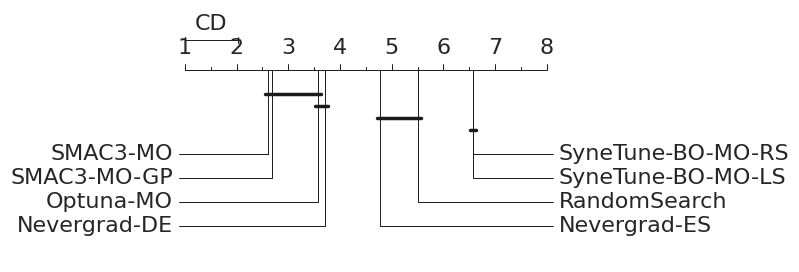

The statistical analysis was conducted for 8 populations with 106 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations SMAC3-MO (p=0.000), SMAC3-MO-GP (p=0.000), Optuna-MO (p=0.000), Nevergrad-DE (p=0.000), Nevergrad-ES (p=0.000), RandomSearch (p=0.000), SyneTune-BO-MO-LS (p=0.000), and SyneTune-BO-MO-RS (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the differ

/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:
/scratch/hpc-prf-intexml/cbenjamins/.conda/envs/carpsexp/lib/python3.10/site-packages/autorank/_util.py:432: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(sorted_ranks[i] - sorted_ranks[j]) <= critical_difference:


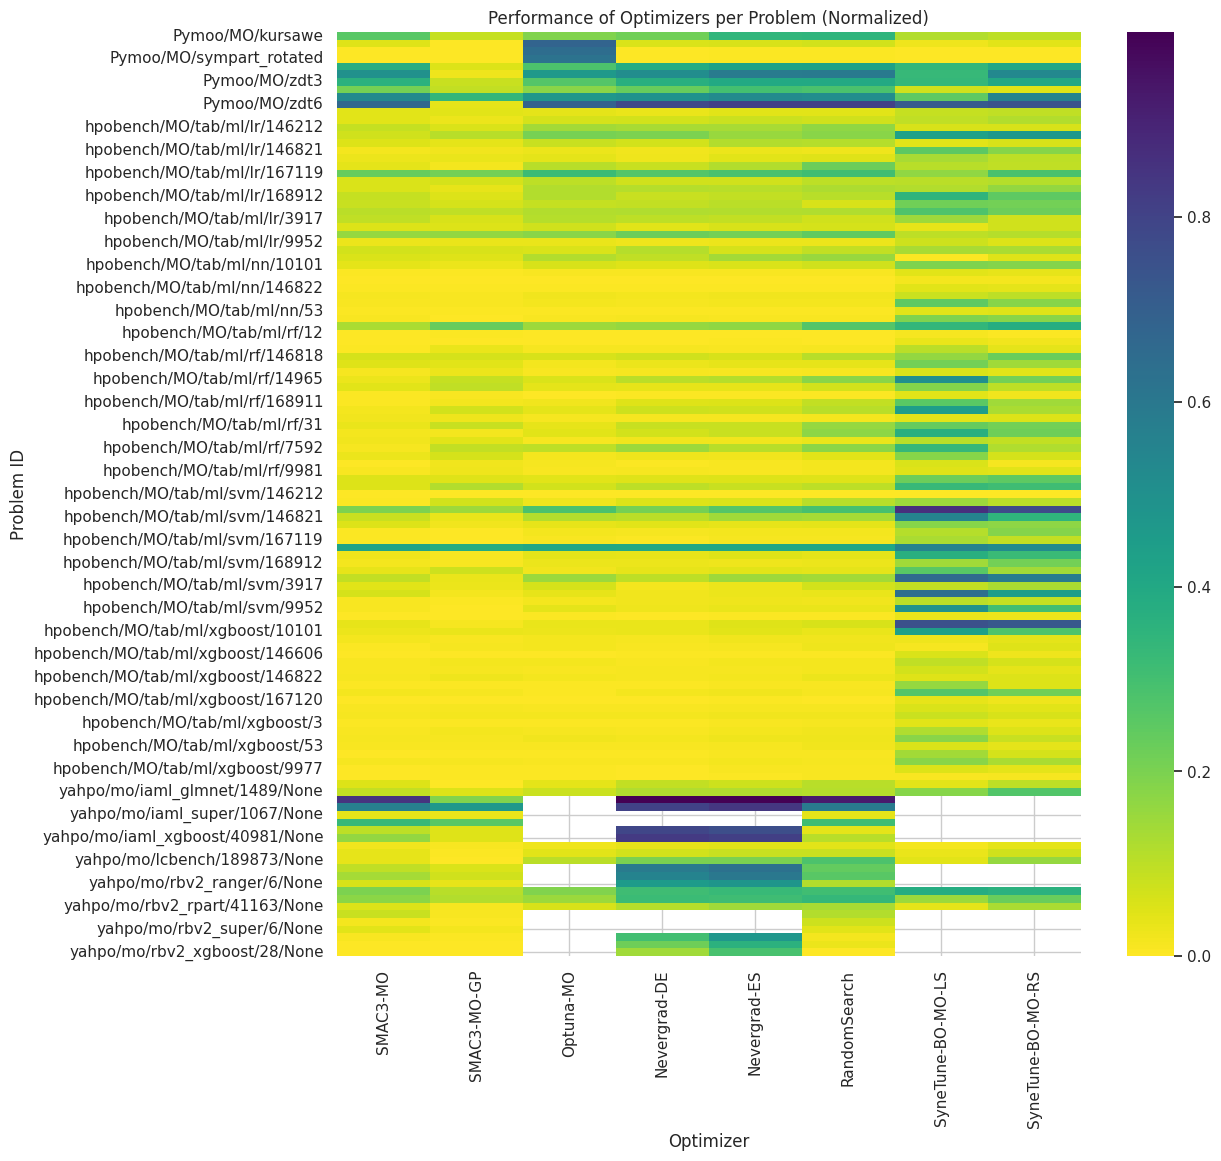

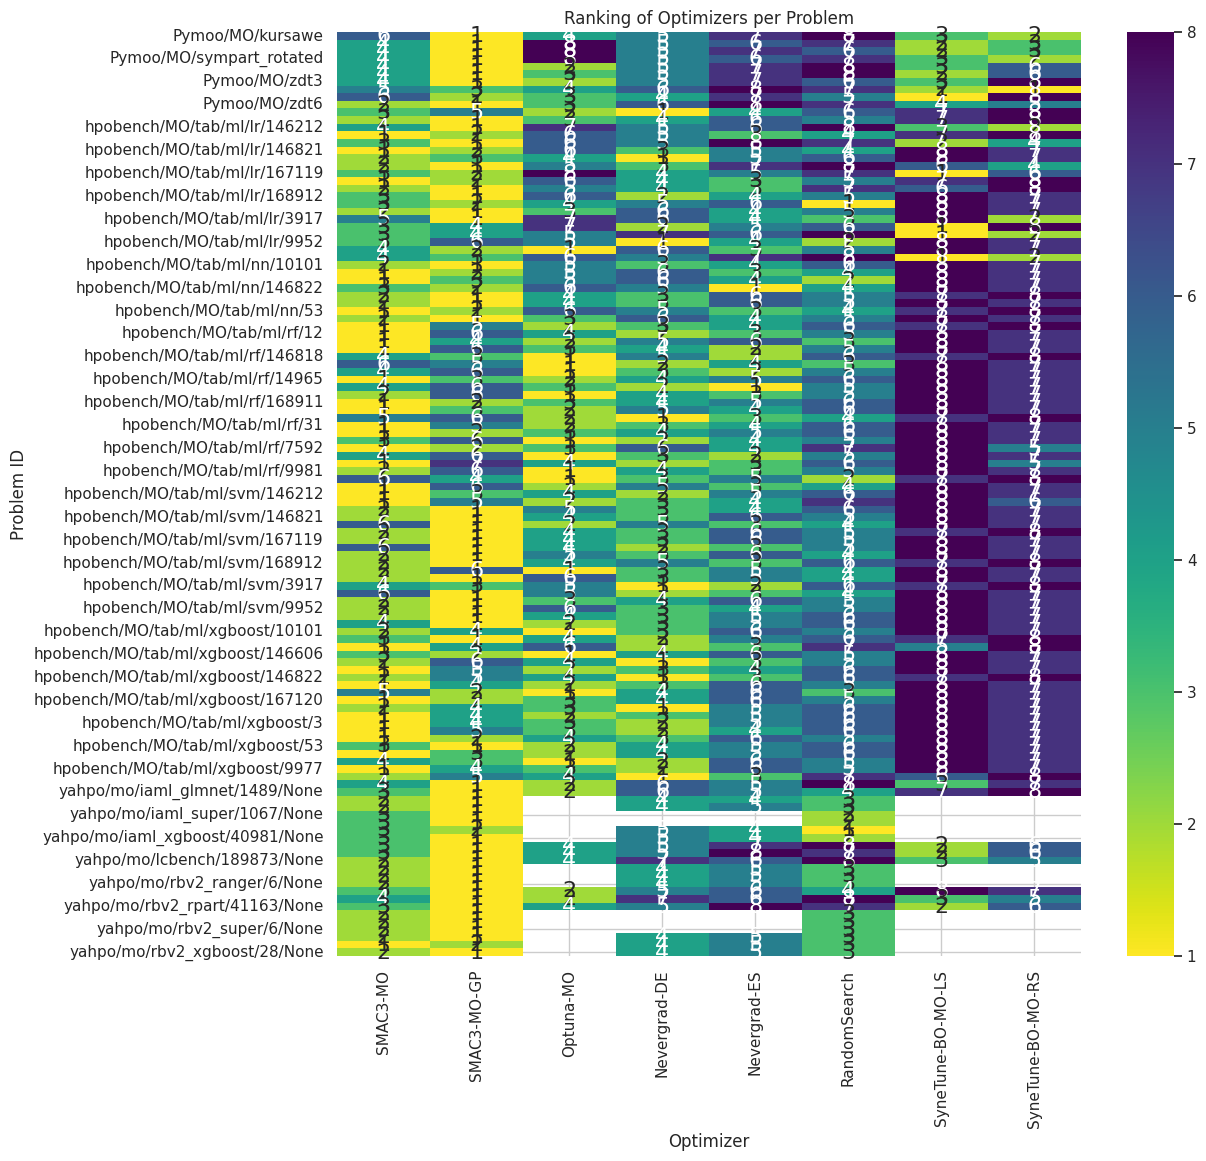

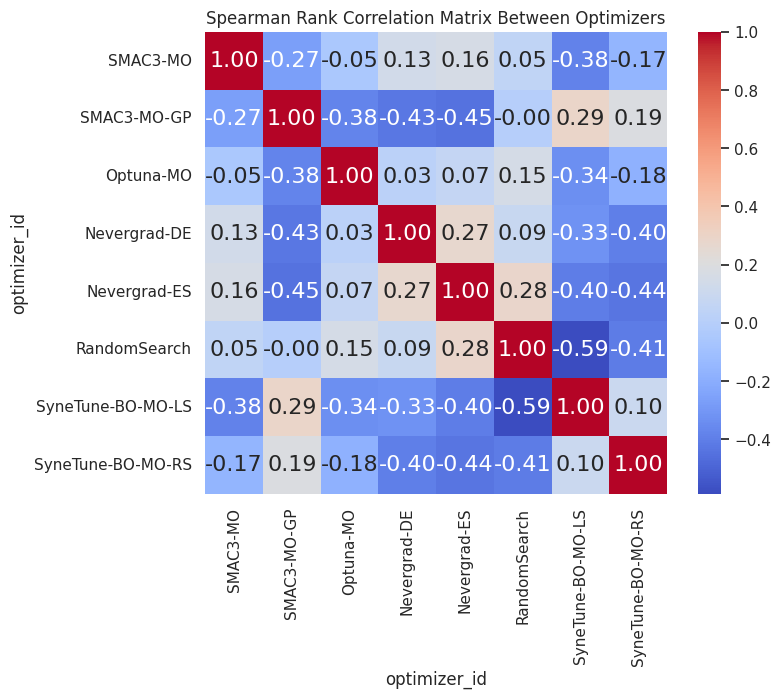

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from carps.analysis.utils import setup_seaborn
import seaborn as sns
from carps.analysis.plot_ranking import plot_ranking

setup_seaborn(font_scale=1)

for gid, gdf in df.groupby(by=["scenario", "set"]):    
    print("-"*100)
    print(gid)
    scenario, set_id = gid
    perf_col = "trial_value__cost_inc_norm"
    if len(gdf) > 0:
        plot_ranking(gdf=gdf, scenario=scenario, set_id=set_id, perf_col=perf_col)


In [6]:

# fig, axes = plot_interval_estimates(performance_data=perf, load_from_pickle=False, figure_filename="figures/plot_interval_estimates.pdf")

('multi-objective', 'full')


('multi-objective', 'full')


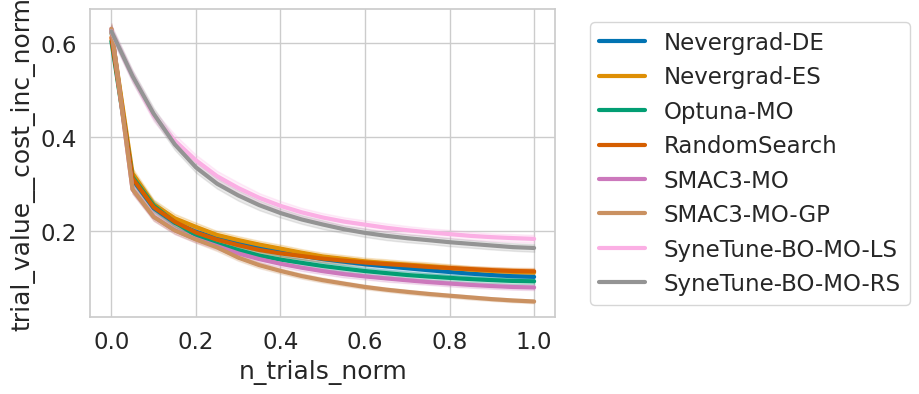

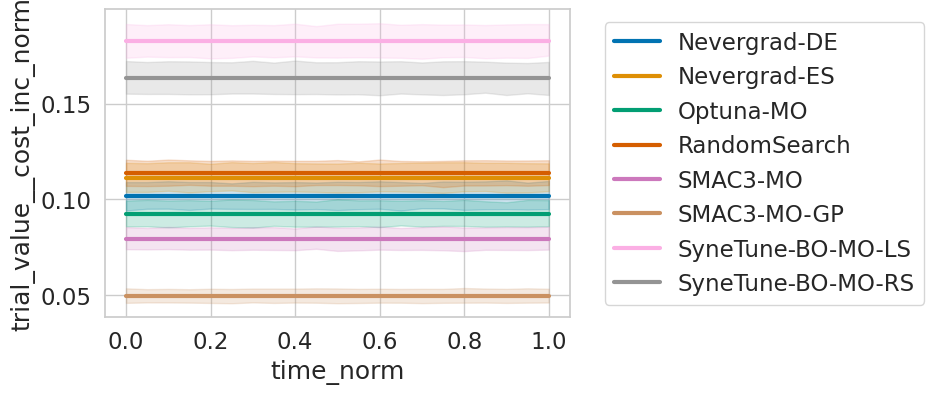

In [7]:
from carps.analysis.performance_over_time import plot_performance_over_time, setup_seaborn, savefig, get_color_palette
import seaborn as sns
import matplotlib
lineplot_kwargs = dict(linewidth=3)
for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="n_trials_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_trials.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )
for gid, gdf in perf_time.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_performance_over_time(
        df=gdf, 
        x="time_norm", 
        y="trial_value__cost_inc_norm", 
        hue="optimizer_id", 
        figure_filename=f"figures/perf_over_time/performance_over_time_{gid}_elapsed.pdf", 
        figsize=(6,4), 
        **lineplot_kwargs
    )

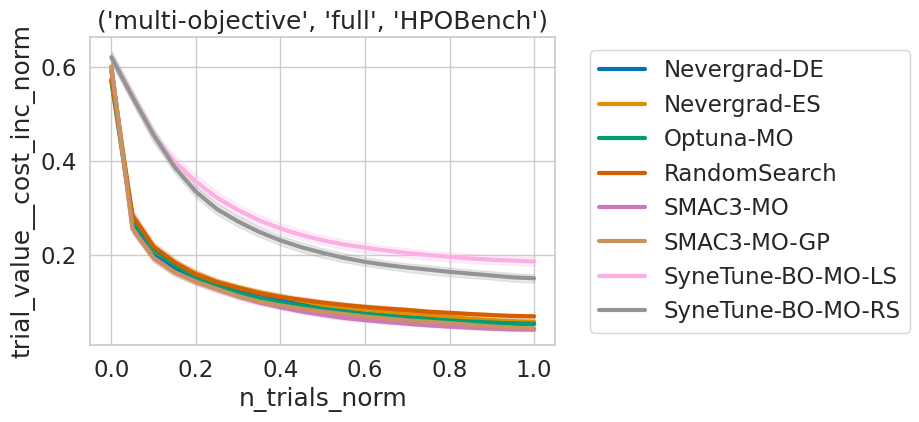

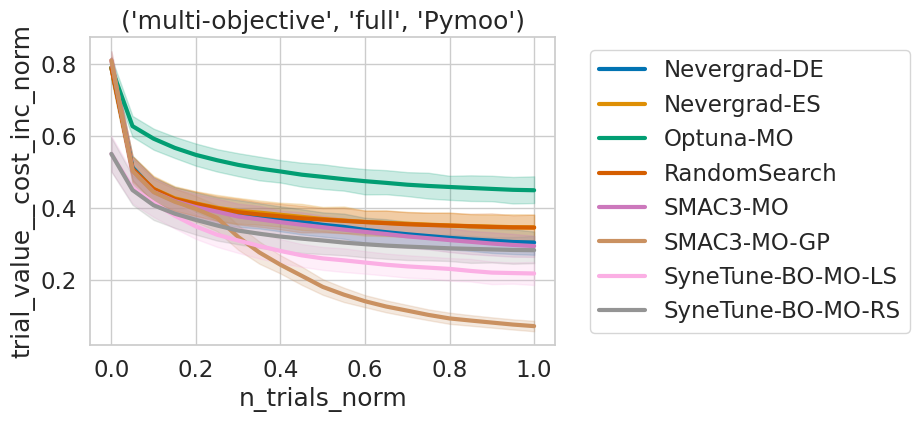

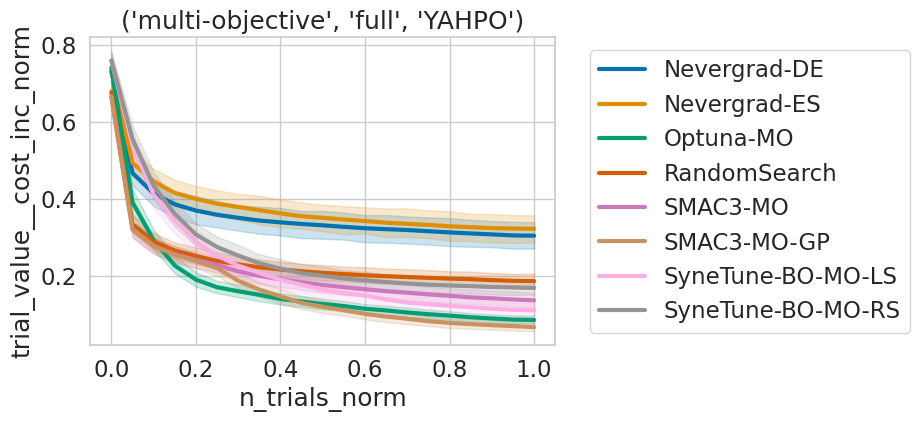

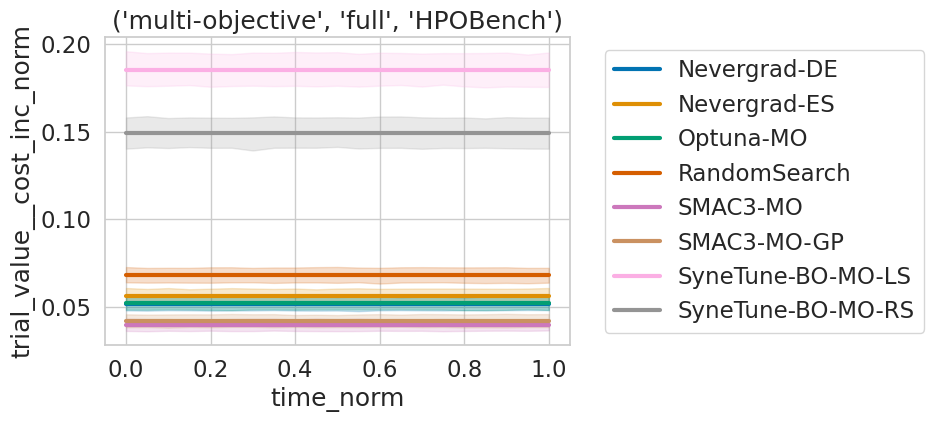

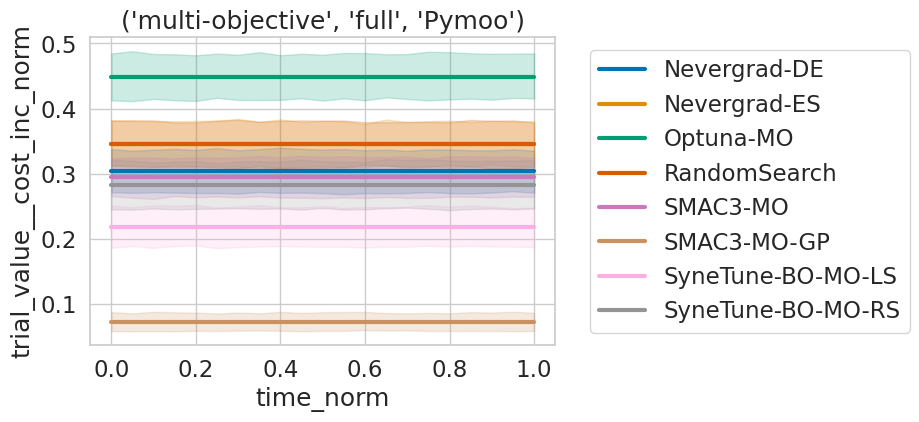

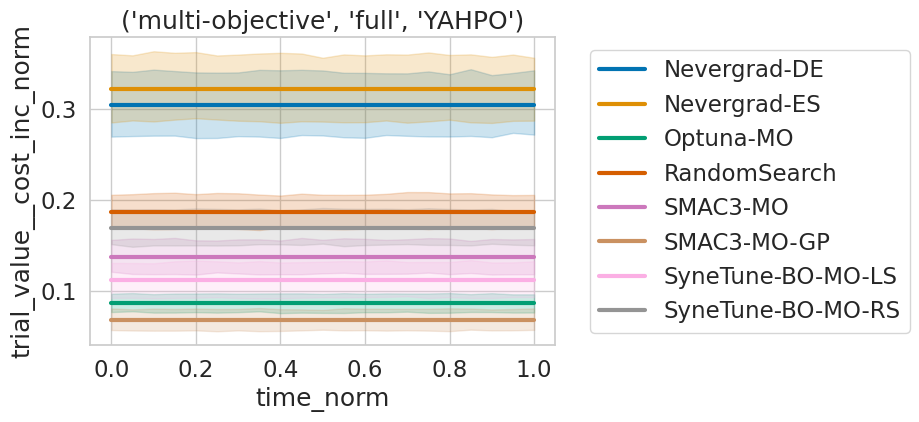

In [8]:
# Plot per benchmark
from carps.analysis.utils import get_color_palette, savefig
from carps.analysis.performance_over_time import plot_performance_over_time

palette = get_color_palette(perf)
lineplot_kwargs = dict(linewidth=3)

for gid, gdf in perf.groupby(by=["scenario", "set", "benchmark_id"]):
    # Iterations
    figure_filename = f"figures/perf_over_time/performance_over_time_trials_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="n_trials_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

# Elapsed time
for gid, gdf in perf_time.groupby(by=["scenario", "set", "benchmark_id"]):    
    figure_filename = f"figures/perf_over_time/performance_over_time_elapsed_{gid}.pdf"
    fig, ax = plot_performance_over_time(df=gdf, x="time_norm", y="trial_value__cost_inc_norm", hue="optimizer_id", figure_filename=figure_filename, figsize=(6,4), **lineplot_kwargs)
    ax.set_title(gid)
    savefig(fig, figure_filename)
    plt.show()

('multi-objective', 'full')


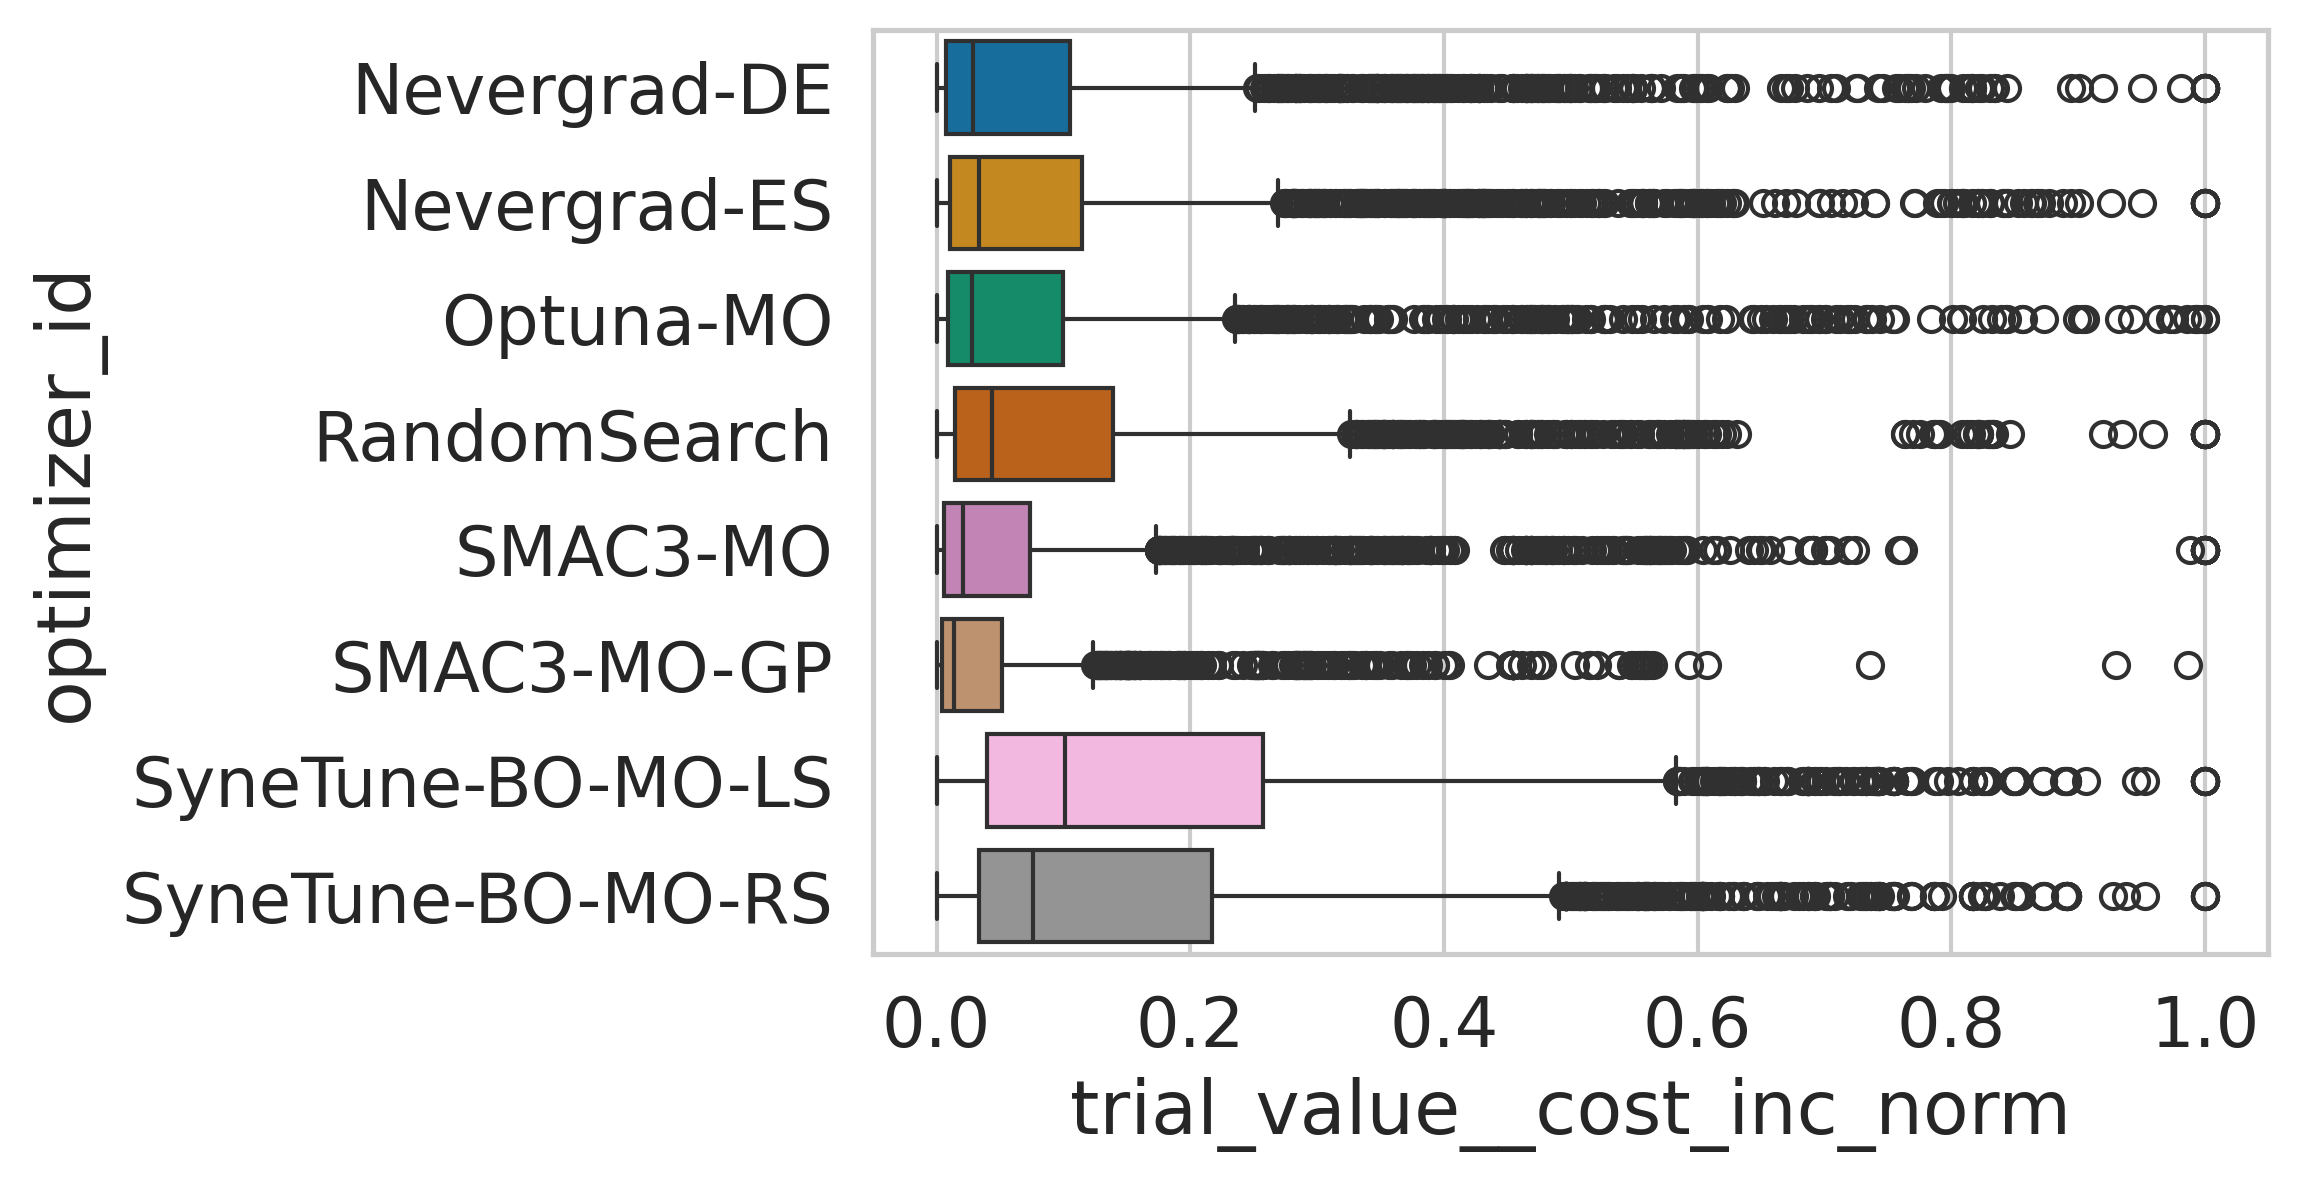

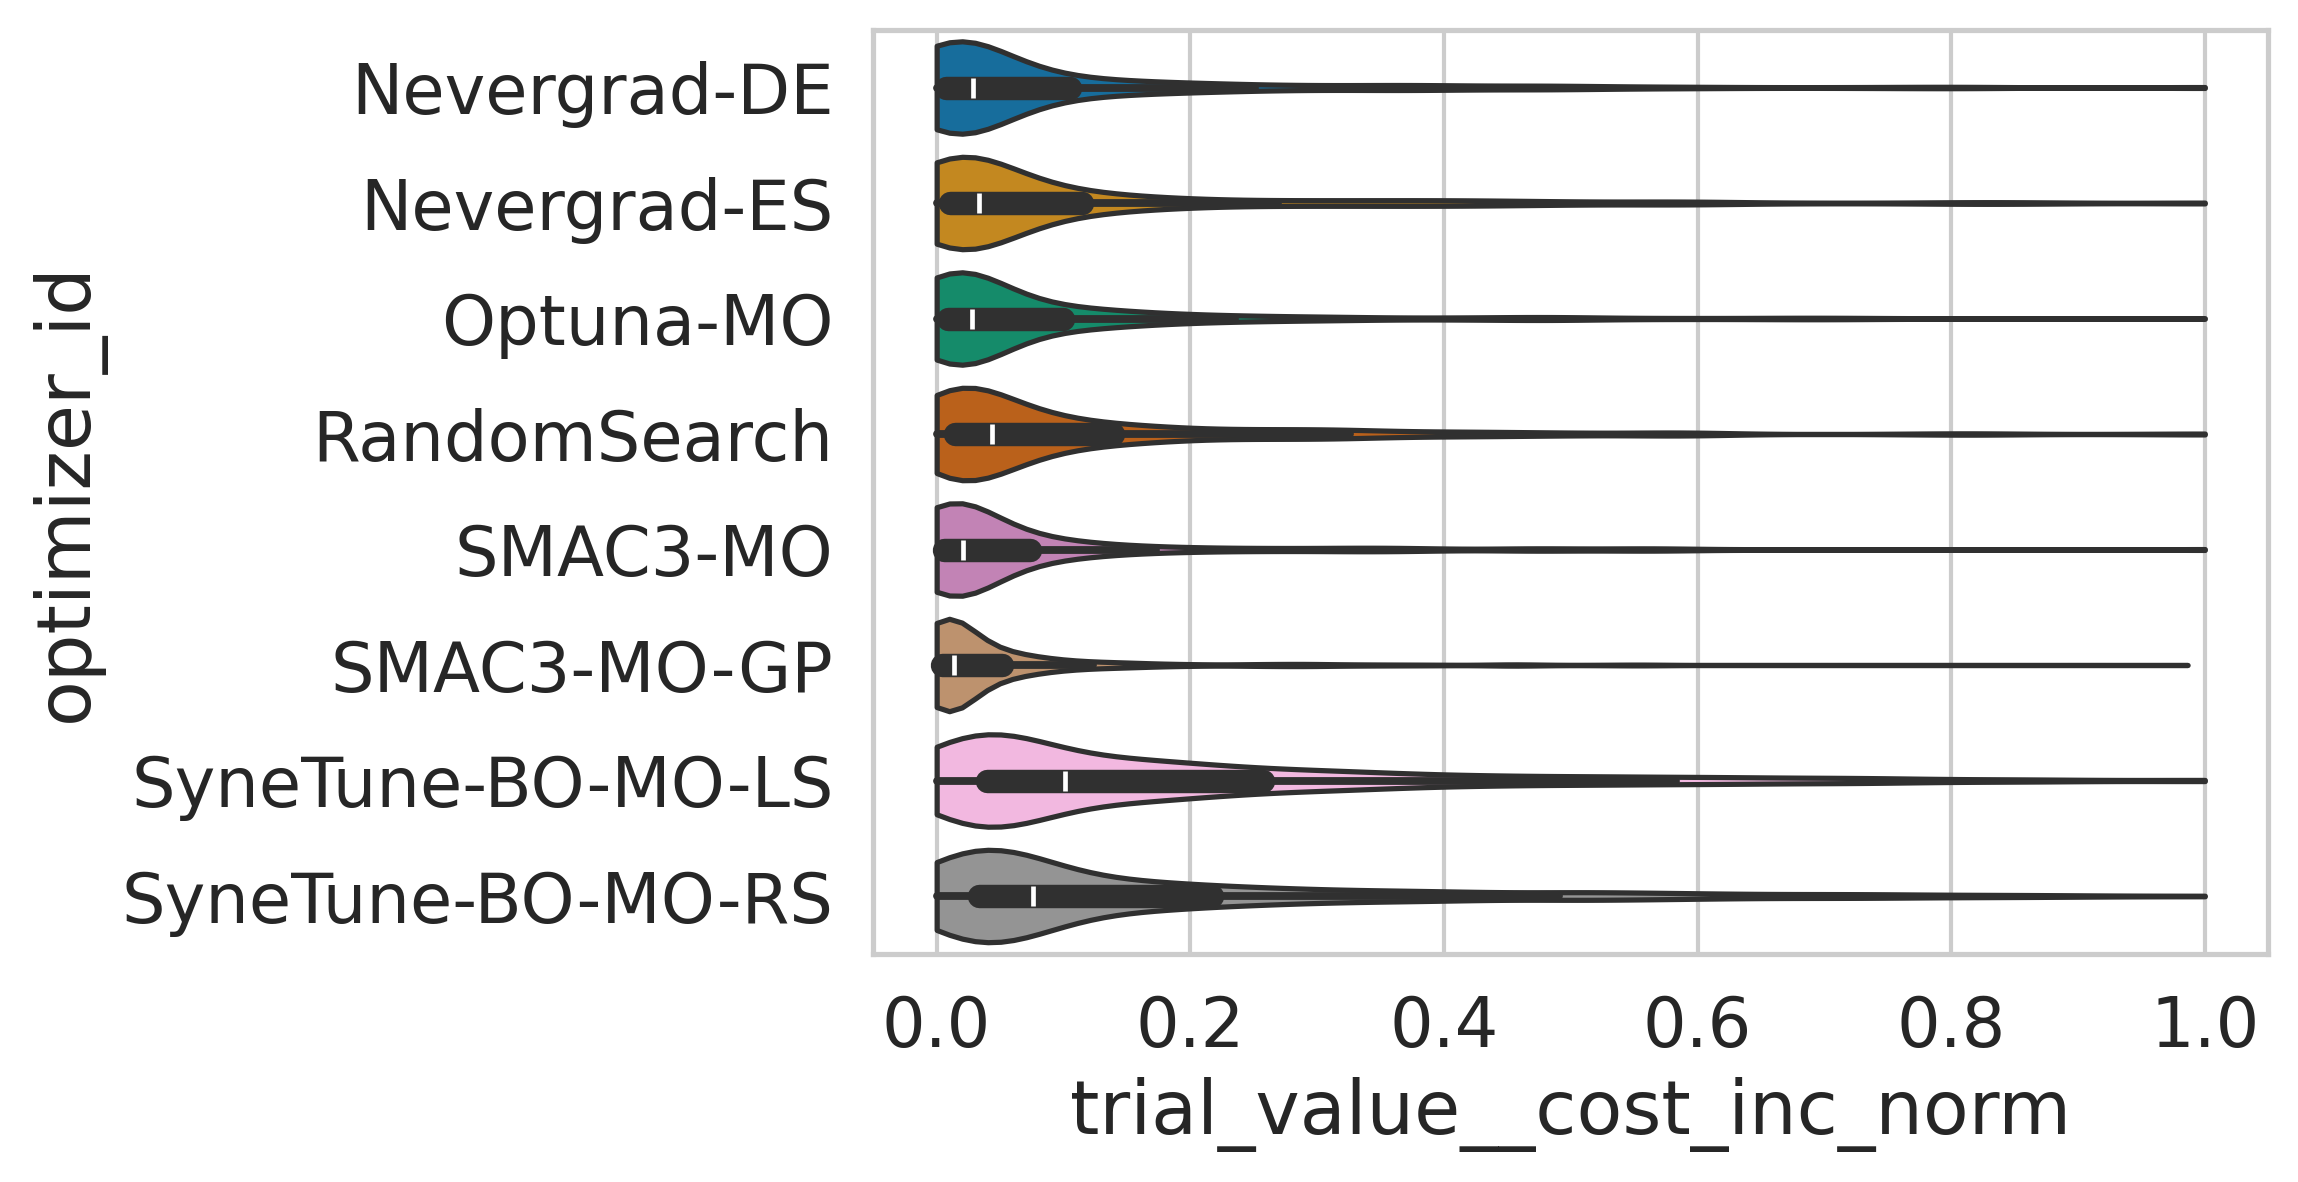

In [9]:
from carps.analysis.final_performance import plot_final_performance_boxplot, plot_final_performance_violinplot
from carps.analysis.utils import filter_only_final_performance

boxplot_kwargs = dict()

for gid, gdf in perf.groupby(by=["scenario", "set"]):
    print(gid)
    fig, ax = plot_final_performance_boxplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_boxplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)
    fig, ax = plot_final_performance_violinplot(
        df=gdf, 
        x="trial_value__cost_inc_norm", y="optimizer_id", hue="optimizer_id", figure_filename=f"figures/final_perf/final_performance_violinplot_{gid}.pdf", figsize=(6,4), **boxplot_kwargs)

In [10]:
max_val = df["n_trials_norm"].max()
error = df.groupby(by=["benchmark_id", "problem_id", "optimizer_id", "seed"])["n_trials_norm"].apply(lambda x: not np.isclose(x.max(), max_val))
error = error[error]
for i in error.index:
    print(i)

('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 1)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 2)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 3)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 4)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 5)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 6)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 7)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 8)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 9)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 10)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 11)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 12)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 13)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 14)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Nevergrad-DE', 15)
('HPOBench', 'hpobench/MO/tab/ml/lr/10101', 'Neve